<a href="https://colab.research.google.com/github/amandaventurac/desmistificando_p_valor/blob/main/desmistificando_p_valor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este  google colaboratory traz os códigos necessários para as figuras e os cálculos para a criação do artigo 'desmistificando o P-valor', do linkedin.

**1. Criando uma distribuição normal do nascimento de meninas a cada 100 bebês**

A curva de frequência relativa das observações em função da proporção de meninas a cada 100 bebês pode ser aproximada por uma distribuição normal. Esses dados serão simulados a seguir, para uma hipotética condição de N observações de 100 nascimentos.

Exemplo: Supondo que a cada dia em uma maternidade tenhamos 100 nascimentos.

* No primeiro dia temos 50 meninas em 100 bebês (50%),
* No segundo dia temos 53 meninas em 100 bebês (53%)
* E assim sucessivamente em N dias.

Após os N dias, vamos fazer um gráfico do número de vezes em que observamos determinada porcentagem de meninas. Se N for 10000 dias, na maioria dos dias esperamos ter observado 50% de meninas. Como a princípio a probabilidade de nascer menino ou menina é a mesma, então não existiria um motivo para o centro desta curva estar diferente de 50%.

Além da média, podemos imaginar a simetria em relação à média.
Como o sexo biológico é um fenômeno aleatório, observar 51 meninas ou 51 meninos(equivalente a 49 meninas) deveria ocorrer em um número de vezes igual ou bem próximo. Assim como observar 52 meninas e 52 meninos (48 meninas) deveria ocorrer em um numéro também parecido, só que um pouco menor que o número anterior, pois é menos provável. Observar 32 meninas ou 32 meninos (68 meninas) é muito menos provável, porém é possível e deve ocorrer em um número muito pequeno de vezes.

Para simular esses dados, estamos supondo que a probabilidade de nascer menino ou menina naturalmente seja governada pelo acaso. Usando uma curva normal para representar esta probabilidades. A  curva normal padrão tem centro em zero, desvio-padrão igual a 1, e é simétrica em relação ao eixo X. Essa curva é criada, e então para simular cada nascimento é selecionado um ponto aleatório nesta curva. Aqui eu coloquei que se a probabilidade deste ponto aleatório está á direita de 0, então será uma menina. Se a probabilidade estiver à esquerda de 0, então será um menino.

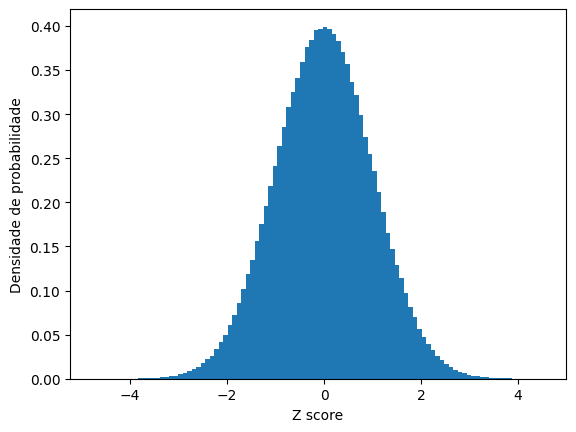

In [15]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(20)
rng = np.random.default_rng()
#código apenas para plotar a normal de probabilidade de nascimento de meninas ou meninos
amostra = []
for i in range(0, 1000000):
  amostra.append(rng.normal())
plt.hist(amostra, bins = 100, density = True)
plt.xlabel('Z score')
plt.ylabel('Densidade de probabilidade')
plt.show()

Para cada N, vamos obter um número de meninas em 100 nascimentos hipotéticos, onde esta escolha 'aleatória' vai seguir a probabilidade de ocorrência segundo a distribuição normal. Isso pode ser feito utilizando a biblioteca **numpy** do python.


In [16]:
np.random.seed(20)
rng = np.random.default_rng()

lista_qtd_meninas = []
for dia in range (0,10001):
  qtd_meninas = 0
  for nascimento in range( 0,101):
    flag_menina = rng.normal()  # seguindo uma distribuição normal de probabilidade, onde se estamos à direita da média (valores positivos), então será menina, caso contrário será menino, como não foram passados parâmetros, o centro é zero e o desvio-padrão é 1.
    if flag_menina >= 0.0:
      qtd_meninas += 1
  lista_qtd_meninas.append(qtd_meninas)




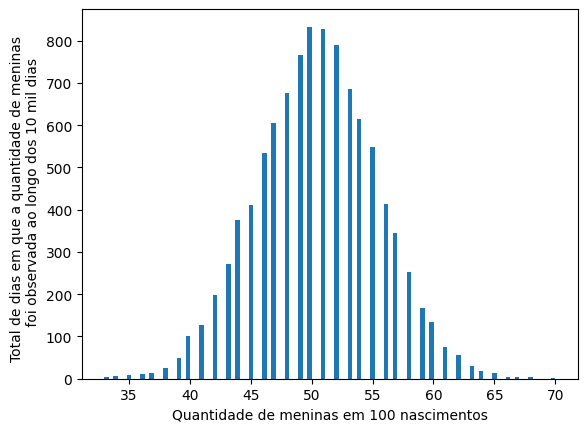

In [17]:
plt.hist(lista_qtd_meninas, bins = 100)
plt.xlabel('Quantidade de meninas em 100 nascimentos')
plt.ylabel('Total de dias em que a quantidade de meninas  \n foi observada ao longo dos 10 mil dias')
plt.show()

Na figura acima, temos o total de dias em que as quantidades de meninas em 100 nascimentos foram observadas. Corretamente observamos mais dias em que nascem 50 meninas, uma quantidade parecida de dias em que nascem 49 e 51 meninas, e uma quantidade muito pequena (perto de zero) em que nascem 32 e 68 meninas.

Já temos a nossa distribuição gráfica que se assemelha a uma distribuição normal, agora vamos ao problema que exemplifica o P-valor.

**2. O contexto do negócio**

Vamos supor que uma empresa kit que interfere no sexo biológico do bebê, favorecendo o nascimento de meninas.

Esta indústria afirma que casais que usam o produto da embalagem rosa teriam uma probabilidade maior do que 50% de ter meninas.

Um teste foi realizado com 200 casais, e foram obtidas 104 meninas, o que é uma proporção de 52 meninas para 100 nascimentos. A pergunta é:
**52 meninas em 100 nascimentos é uma evidência da eficácia deste produto?**

Para responder a essa pergunta podemos olhar a figura anterior.
Vemos que exatamente 52 nascimentos de meninas ocorreram em mais de 700 dias em 10 mil dias, ou seja , em mais de 7% dos dias observados.

**Aqui poderíamos pensar que obter um resultado que ocorre em apenas 7% das vezes é algo raro, então o produto deve ser bom! Errado**.

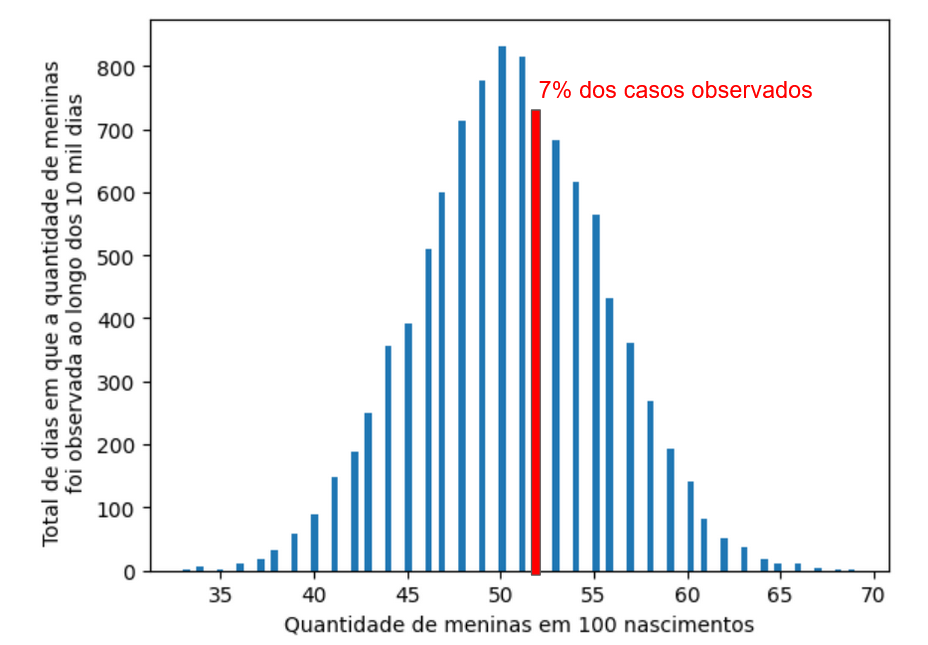



Olhando o gráfico com atenção vemos que o ponto máximo está em 800, e a quarta barra mais alta é a que estamos analisando, perto de 700. Apesar de estar tão perto do centro da curva, 52 meninas ocorrem em  apenas 7% dos casos porque estamos olhando o total de dias em que vemos **EXATAMENTE** 52 meninas.

Se ao invés disso, formos olhar a quantidade de dias em que temos 52 meninas ou mais, teriamos que somar todas as barras desde 52 meninas até 100 meninas, que nesse caso é obter o total de dias para todas as condições inclusas: 52 meninas, 53 meninas, 54 meninas, etc, até 100 meninas se houver.

O código abaixo faz isso para nós.



In [18]:
import pandas as pd
counts = pd.Series(lista_qtd_meninas).value_counts()

In [19]:
lista_dias_52_meninas_ou_mais = []
for qtd_meninas in counts.keys():
  if qtd_meninas>= 52:
    lista_dias_52_meninas_ou_mais.append(counts.get(qtd_meninas))

In [20]:
sum(lista_dias_52_meninas_ou_mais)

4157

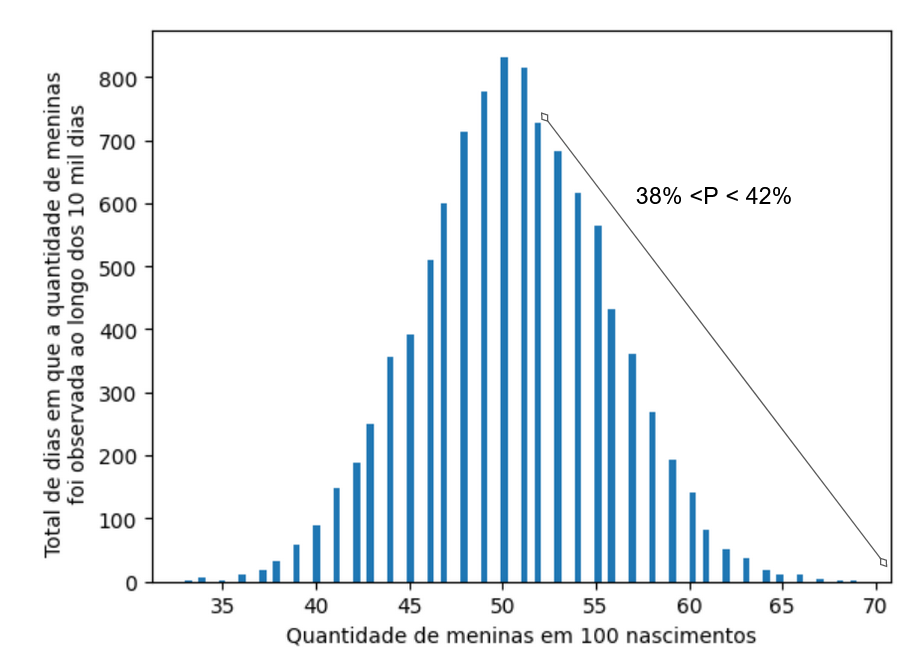

Assim, tivemos nascimento de 52 meninas ou mais em quase 4.2 mil dos 10 mil dias, o que corresponde a 42% das vezes.

A probabilidade de ocorrer essa situação, para a distribuição normal exata é 0.3821 [1] , o que representaria 38.21% dos casos.

Nosso valor está perto do que imaginamos para a distribuição normal, e a diferença em relação à distribuição exata pode ocorrer porque estamos analisando uma distribuição discreta de dados limitados e simulados.

**Com esses novos dados, podemos olhar o problema de uma nova perspectiva: na verdade, 52 meninas ou mais tem probabilidade de ocorrer em quase 40% dos casos observados!**

Com essa informação podemos perceber que o aumento de 50 para 52 meninas no teste com o produto não é "não-usual", assim, não podemos rejeitar o acaso como uma hipótese razoável para explicar os resultados.  

O acaso aqui pode ser chamado **"hipótese nula"**, ou seja, a hipótese de que a aleatoriedade pode explicar a diferença. A eficiência do produto seria uma **"hipótese alternativa"**, ou seja, se o acaso não fosse razoável para explicar a diferença observada, rejeitaríamos a hipótese nula e associamos a diferença à hipótese alternativa.

Agora outra questão entra em cena, você poderia perguntar:

**Mas então Amanda, com quantos nascimentos de meninas eu poderia dizer que o produto entrega o que promete?**

Da mesma forma que olhamos a probabilidade de ocorrer 52 nascimentos de meninas ou mais, podemos usar uma lógica similar. Para que um evento seja considerado não-usual (não explicado meramente pelo acaso), você imagina que ele deveria ocorrer que probabilidade?

E aqui já estamos falando do valor P :)

Acontece que **o valor P é o valor da probabilidade de ter a ocorrência de um evento que seja, no mínimo,  tão extremo quanto o representado nos dados**. Aqui, o valor P de 52 nascimentos de meninas ou mais é a probabilidade de ter 52 meninas ou mais, em torno de 0.38 (ou 38%). Graficamente se aproxima da soma dos dias nas barras do nosso gráfico, de 52 nascimentos até o valor máximo, lembrando de dividir pelo total de 10 mil dias.  A parte "no mínimo" nesta frase faz o nosso resultado diferir dos 7% que fomos levados a crer anteriormente.

E o valor de probabilidade a partir do qual você aceita que um evento não seja explicado meramente pelo acaso é o que chamamos de **alfa ou nível de significância**. Geralmente é utilizado um valor de **alfa = 0.05**, ou seja, se ocorreu um evento de probabilidade menor ou igual a 0.5 então isso não pode usualmente ser explicado pelo acaso, e algo deve ter contribuído para o resultado (a hipótese alternativa).



O problema aplicado aos nossos dados se reduz a achar uma barra no gráfico a partir da qual a soma desta barra com as outra à direita dela, dividindo pelo total de 10 mil dias, resulte em aproximademente 5%.

Podemos ir somando as barras começando da direita e indo em direção à esquerda, até que encontremos um total igual ou inferior a:
* 5% de 10 mil dias = 500 dias.

O código abaixo calcula esse total de dias e identifica a quantidade de nascimentos de meninas associada a ele:

In [21]:
dias = [0] #colocando um elemento nulo para iniciar a lista e evitar erro de índice inexistente no laço while
qtd_meninas_reversa = [0]
for key in sorted(list(counts.keys()), reverse = True): #percorrendo a lista de quantidades de nascimentos de meninas na ordem da maior quantidade para a menor # enquanto o ultimo elemento da lista soma_dias for menor do que 500 (ou o total acumulado for menor que 500):
    dias.append(counts.get(key))
    qtd_meninas_reversa.append(key)
    if sum(dias) > 500:
      break

print('A quantidade de nascimento de meninas maior ou igual a {} ocorreu em {} dias, e a quantidade de nascimento de meninas maior ou igual a {} ocorreu em {} dias'.format(qtd_meninas_reversa[-1], sum(dias), qtd_meninas_reversa[-2], sum(dias) - dias[-1] ))

A quantidade de nascimento de meninas maior ou igual a 59 ocorreu em 507 dias, e a quantidade de nascimento de meninas maior ou igual a 60 ocorreu em 340 dias


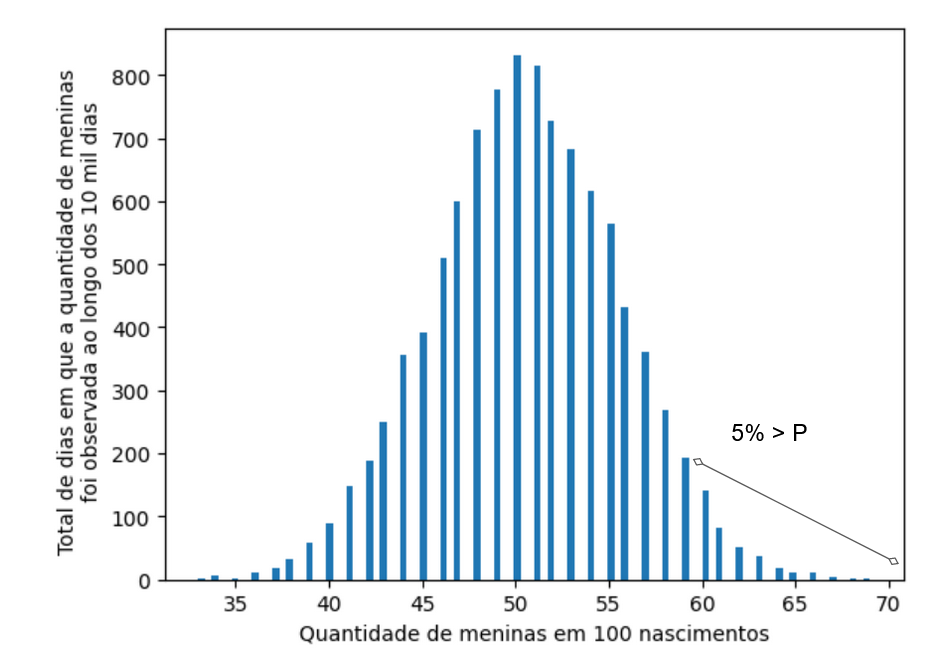

Com 59 nascimentos de meninas nós passamos da quantidade de 500 dias que escolhemos para a significância de 0.05, convenção adotada aqui para um evento não usual que não deve ser explicado pelo acaso.
Com 60 nascimentos de meninas teríamos 355 dias, e isso está dentro do que esperamos de máximo de dias para um evento não usual. **Utilizando o gráfico gerado com esses dados, podemos dizer que o acaso não é suficiente para explicar o 60 nascimentos de meninas ou mais, e o produto deve funcionar.**  

Para os dados aproximados de uma distribuição normal, retirados do gráfico em [1], teríamos o valor de 59 nascimentos. Aqui utilizamos uma simulação de dados aleatórios e limitados para poder chegar ao resultado pelo método da análise gráfica do histograma, e chegamos a um resultado muito próximo.

A conclusão final é que com 52 nascimentos de meninas em 100, não podemos dizer que o produto é efetivo. Mas a partir de 59 nascimentos de meninas poderíamos rejeitar o efeito do acaso considerando um nível de significância de 0.05, e relacionar o aumento das bebês ao uso do produto, quando a distribuição dos dados se aproxima de uma distribuição normal.

[1]Introducão à Estatística, Mario F Triola, LTC,  p.307-310, edição 10.